## CREDIT RISK ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("cs-training.csv")
test_df = pd.read_csv("cs-test.csv")
sample_entry = pd.read_csv("sampleEntry.csv")

In [4]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
train_df.drop(columns = ['Unnamed: 0'], inplace = True)
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [6]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
test_df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [8]:
test_df.drop(columns = ['Unnamed: 0'], inplace = True)
test_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [9]:
test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [10]:
sample_entry

,Id,Probability
0,1,0.14
1,2,0.06
2,3,0.00
3,4,0.04
4,5,0.08
...,...,...
101498,101499,0.01
101499,101500,0.61
101500,101501,0.00
101501,101502,0.13


In [11]:
train_df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [12]:
train_df.isna().sum()


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean').fit(train_df[['MonthlyIncome']])

has_monthly_income_na = train_df['MonthlyIncome'].isna()
train_df['MonthlyIncome'] = si.transform(train_df[['MonthlyIncome']])

train_df.loc[has_monthly_income_na, 'DebtRatio'] = train_df.loc[has_monthly_income_na, 'DebtRatio']/train_df.loc[has_monthly_income_na, 'MonthlyIncome']

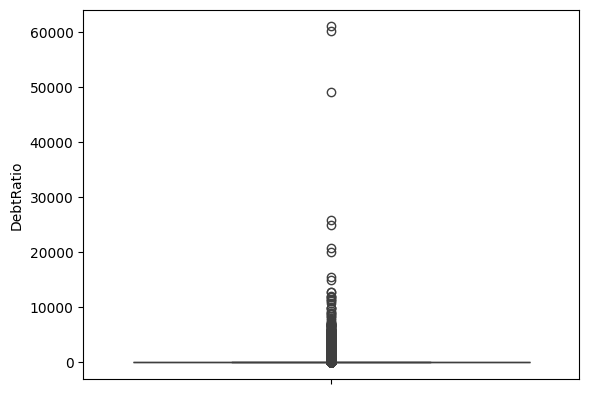

In [14]:
import seaborn as sns

sns.boxplot(train_df['DebtRatio'])
plt.show()

In [15]:
def remove_outliers(df, column_name, iqr_multiplier = 2):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    df = df[(df[column_name] >= lower_bound) & \
            (df[column_name] <= upper_bound)]
    return df

train_df = remove_outliers(train_df, 'DebtRatio')

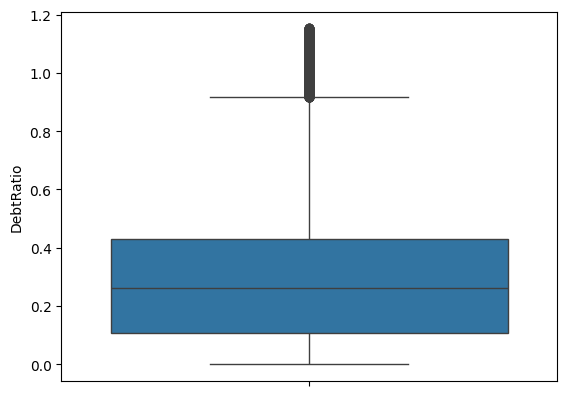

In [16]:
sns.boxplot(train_df['DebtRatio'])
plt.show()

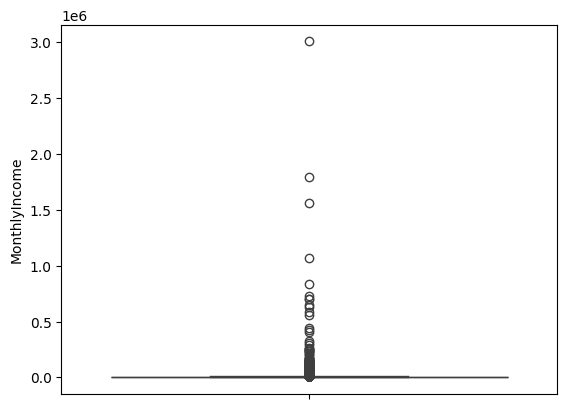

In [17]:
sns.boxplot(train_df['MonthlyIncome'])
plt.show()

In [18]:
train_df = remove_outliers(train_df, 'MonthlyIncome')

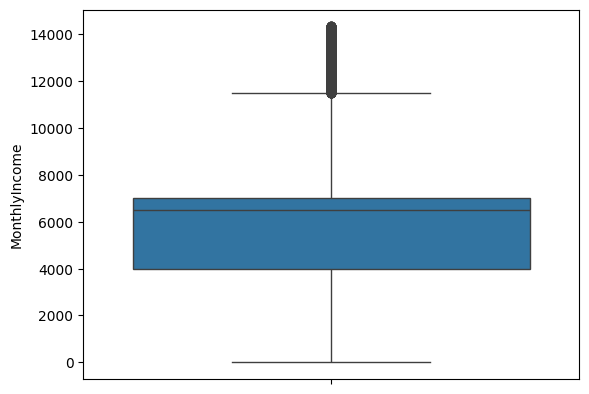

In [19]:
sns.boxplot(train_df['MonthlyIncome'])
plt.show()

In [20]:
independent_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
                    'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                    'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                    'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                    'NumberOfDependents']
dependent_col = 'SeriousDlqin2yrs'

In [21]:
train_df[independent_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3906
dtype: int64

In [22]:
train_df.dropna(subset=['NumberOfDependents'],inplace=True)

In [23]:
import pandas as pd
import numpy as np
import random
random.seed(4)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [24]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical", numeric_preprocessor, independent_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['RevolvingUtilizationOfUnsecuredLines', 'age',
                                  'NumberOfTime30-59DaysPastDueNotWorse',
                                  'DebtRatio', 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans',
                                  'NumberOfTimes90DaysLate',
                                  'NumberRealEstateLoansOrLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse',
                                  'NumberOfDependents'])])

In [25]:
df_sample = train_df.sample(5000, random_state=4)
X = df_sample[independent_cols]
y = df_sample[dependent_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [27]:
X_train.head(), y_train.head()

(        RevolvingUtilizationOfUnsecuredLines  age  \
 141495                              0.034047   46   
 24490                               0.220320   32   
 141009                              1.000000   25   
 79805                               0.402281   59   
 9637                                0.898033   55   
 
         NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
 141495                                     0   0.194085         9500.0   
 24490                                      0   0.163583         1350.0   
 141009                                     1   0.084399         4300.0   
 79805                                      0   0.183446         5750.0   
 9637                                       1   0.506092         3200.0   
 
         NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
 141495                               10                        0   
 24490                                 5                        0   
 141009        

In [28]:
rf = RandomForestClassifier(random_state=4)
lr = LogisticRegression(random_state=4)
models_to_try = [rf, lr]

In [29]:
all_pipelines = {}
for m in models_to_try:
    # Create a scikit-learn pipeline
    all_pipelines[m] = pipeline = make_pipeline(preprocessor, m)
    # Perform cross-validation on the training data
    cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=4, scoring='roc_auc')
    print(m)
    print(f"Cross-Validation Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}\n")

RandomForestClassifier(random_state=4)
Cross-Validation Scores: [0.82560474 0.81773933 0.88010923 0.86179071]
Mean Cross-Validation Score: 0.8463110002835008

LogisticRegression(random_state=4)
Cross-Validation Scores: [0.65396054 0.70792006 0.717863   0.7260794 ]
Mean Cross-Validation Score: 0.7014557518642254



In [30]:
all_pipelines[rf].fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=4))])

In [31]:
from sklearn.metrics import roc_auc_score

y_pred = all_pipelines[rf].predict_proba(X_test)[:, 1]
print(f'Test AUC of best model = {roc_auc_score(y_test, y_pred)}')


Test AUC of best model = 0.8203723659003832


In [32]:
all_pipelines[rf].fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=4))])

In [33]:
test_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [34]:
has_monthly_income_na = test_df['MonthlyIncome'].isna()
test_df['MonthlyIncome'] = si.transform(test_df[['MonthlyIncome']])

test_df.loc[has_monthly_income_na, 'DebtRatio'] = test_df.loc[has_monthly_income_na, 'DebtRatio']/test_df.loc[has_monthly_income_na, 'MonthlyIncome']

In [35]:
test_df.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [36]:
test_df[dependent_col] = all_pipelines[rf].predict(test_df)

In [37]:
test_df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.97536
1    0.02464
Name: proportion, dtype: float64

In [38]:
sample_entry

,Id,Probability
0,1,0.14
1,2,0.06
2,3,0.00
3,4,0.04
4,5,0.08
...,...,...
101498,101499,0.01
101499,101500,0.61
101500,101501,0.00
101501,101502,0.13


In [39]:
sample_entry['Probability'] = all_pipelines[rf].predict_proba(test_df)[:, 1]

In [40]:
sample_entry.to_csv('sampleEntry.csv', index=False)

In [41]:
X_train.isnull().sum()


RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [43]:
!pip install imbalanced-learn



   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data (X_train, y_train)
smote = SMOTE(random_state=4)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the resampled data
print(f'Original class distribution in y_train: {y_train.value_counts()}')
print(f'Resampled class distribution in y_train: {y_train_res.value_counts()}')


Original class distribution in y_train: SeriousDlqin2yrs
0    4189
1     311
Name: count, dtype: int64
Resampled class distribution in y_train: SeriousDlqin2yrs
0    4189
1    4189
Name: count, dtype: int64


In [45]:
# Check for NaN values in X_train
print(X_train.isnull().sum())


RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
